In [9]:
import torch
from datasets.datasets import build_dataset
dataset =  build_dataset("/mnt/cache/zhengjinliang/ElectricityMeter", train = False)


{'boxes': tensor([0.5068, 0.3293, 0.5946, 0.1138]), 'text': tensor([9, 9, 9, 4, 0, 9]), 'size': tensor([480, 612])}
480 612


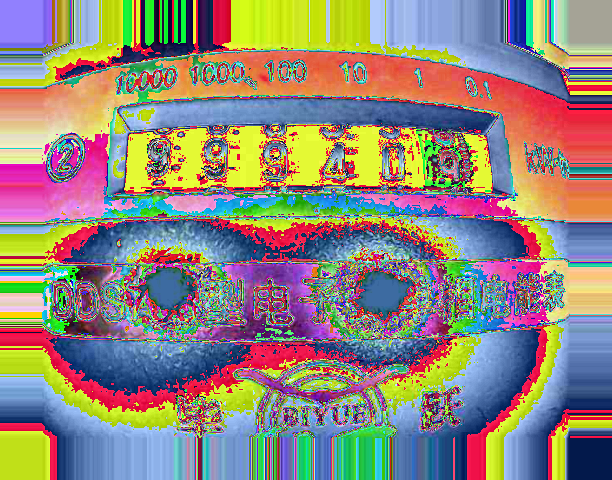

tensor([0.5068, 0.3293, 0.5946, 0.1138])
tensor([128.1892, 130.7586, 363.8919,  54.6207])
tensor([130.7586, 128.1892,  54.6207, 363.8919])


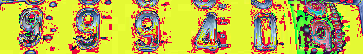

In [10]:

from torchvision.transforms import ToPILImage
from torchvision.transforms.functional import crop as imgCrop
from util.box_ops import center_to_crop_box

data = dataset[1]
print(data[1])
W, H = data[0].shape[-2:]
print(W,H)
a = ToPILImage()(data[0])
display(a)

print(data[1]['boxes'])
box = center_to_crop_box(data[1]['boxes']) * torch.tensor([H, W, H, W])
print(box)
# box = dataset[0][1]['boxes'] * torch.tensor([H, W, H, W])
print(box[(1,0,3,2),])
display(ToPILImage()(imgCrop(data[0], *box[(1,0,3,2),].int())))


In [8]:
from models import build_model
from easydict import EasyDict


args = dict(backbone = "resnet18", position_embedding = 'sine', masks = False, dilation = False,
    enc_layers=3, dec_layers=3, dim_feedforward=512, hidden_dim=192, dropout=0.1, nheads=6,
    lr_backbone = 1e-4,    pre_norm=False, one_stage = False, multi_final = True
 )
args = EasyDict(args)
model = build_model(args)
model = model[0]
ckpt = torch.load("/mnt/cache/zhengjinliang/Ammeter/exp/good_idea/ckpt2/checkpoint.pth", map_location='cpu')
model.load_state_dict(ckpt['model'])


<All keys matched successfully>

torch.Size([1, 3, 480, 612])


/mnt/cache/zhengjinliang/Ammeter/models/position_encoding.py:41: UserWarning: __floordiv__ is deprecated, and its behavior will change in a future version of pytorch. It currently rounds toward 0 (like the 'trunc' function NOT 'floor'). This results in incorrect rounding for negative values. To keep the current behavior, use torch.div(a, b, rounding_mode='trunc'), or for actual floor division, use torch.div(a, b, rounding_mode='floor').
  dim_t = self.temperature ** (2 * (dim_t // 2) / self.num_pos_feats)


{'boxes': tensor([0.5351, 0.3888, 0.5595, 0.1534]), 'text': tensor([ 0,  3,  2,  1,  3, 10]), 'size': tensor([480, 612])}
tensor([[0, 0, 2, 2, 0, 9]])
tensor([[0.5109, 0.4082, 0.5720, 0.1583]], grad_fn=<SqueezeBackward1>)


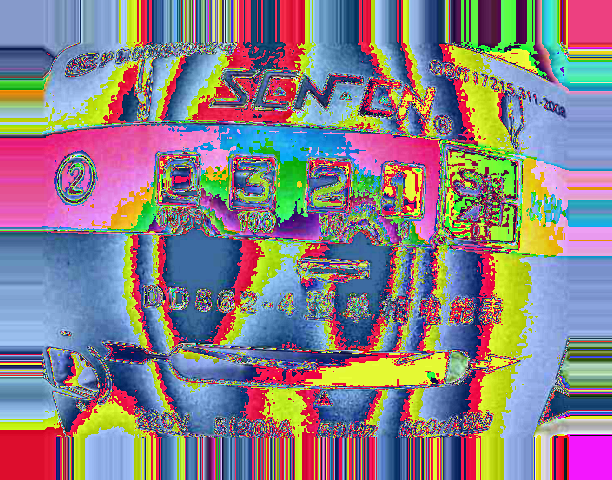

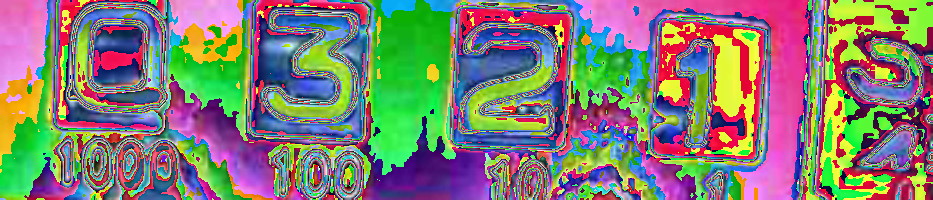

In [11]:
id = -50
input = dataset[id][0].unsqueeze(0)
print(input.shape)
output = model(input, True)
box, final, cropped = output
print(dataset[id][1])
print(final.softmax(-1).max(-1).indices)
print(box)
display(ToPILImage()(dataset[id][0]))
display(ToPILImage()(cropped.tensors[0]))

In [ ]:
box_ckpt = torch.load("/mnt/cache/zhengjinliang/Ammeter/exp/data_aug_all/ckpt/checkpoint.pth", map_location="cpu")
text_ckpt = torch.load("/mnt/cache/zhengjinliang/Ammeter/exp/tiny_1_text_finetune/ckpt/checkpoint.pth", map_location="cpu")

box_ckpt = box_ckpt['model']
text_ckpt = text_ckpt['model']
keys = list(box_ckpt.keys())
for key in keys:
    if not key.startswith("box_detector"):
        del box_ckpt[key]
    else:
        del text_ckpt[key]
args = dict(backbone = "resnet18", position_embedding = 'sine', masks = False, dilation = False,
    enc_layers=3, dec_layers=3, dim_feedforward=512, hidden_dim=192, dropout=0.1, nheads=6,
    lr_backbone = 1e-4,    pre_norm=False, one_stage = False
 )
args = EasyDict(args)
model = build_model(args)
model = model[0]
model.load_state_dict(box_ckpt, strict=False)
model.load_state_dict(box_ckpt, strict=False)



In [2]:
import torch
from torchvision.transforms import ToPILImage
from datasets.selfdata import build_self_dataset
dataset =  build_self_dataset("/mnt/cache/zhengjinliang/ElectricityMeter", 1000)


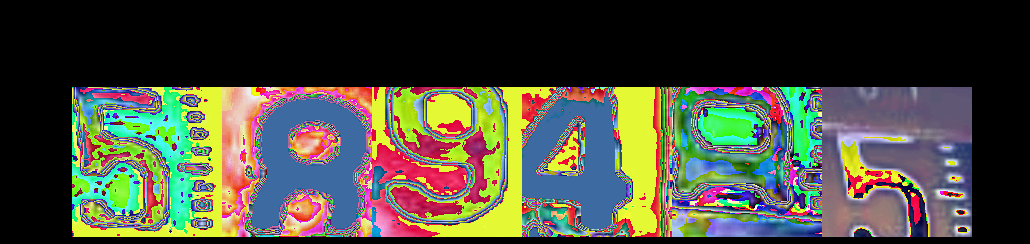

{'text': tensor([5, 8, 9, 4, 8, 5])}


In [21]:
img, tar = dataset[3]

display(ToPILImage()(img))
print(tar)

In [29]:
args = dict(backbone = "resnet18", position_embedding = 'sine', masks = False, dilation = False,
    enc_layers=3, dec_layers=3, dim_feedforward=512, hidden_dim=192, dropout=0.1, nheads=6,
    lr_backbone = 1e-4,    pre_norm=False, one_stage = True, multi_final=True
 )

args = EasyDict(args)
model = build_model(args)
model = model[0]
ckpt = torch.load("/mnt/cache/zhengjinliang/Ammeter/exp/text_pre_trained/ckpt2/checkpoint.pth", map_location='cpu')
model.load_state_dict(ckpt['model'])

NameError: name 'EasyDict' is not defined

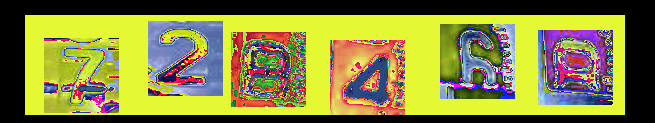

tensor([[[7, 2, 8, 4, 6, 8]]]) {'text': tensor([7, 2, 8, 4, 6, 8])}


In [22]:
img, tar = dataset[4]
display(ToPILImage()(img))
img = img.unsqueeze(0)
out = model(img)
print(out.softmax(-1).max(-1).indices, tar)
